In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
file = "data/combined_thin.csv"
df = pd.read_csv(file,low_memory=False)

In [3]:
lst=[]
lst=['Accessible', 'Air conditioning', 
       'BBQ grill', 'Baby friendly','Changing table', 'Bath towel', 'Bathtub',
       'Beachfront', 
       'Breakfast',  'Coffee maker',
        'Dishwasher', 'Doorman',
       'Elevator', 'Extra pillows and blankets',
       'Family/kid friendly',
       'Firm mattress', 'First aid kit',
       'Free parking', 'Game console',
       'Garden or backyard', 'Gym',
       'Heating',
         'Hot tub', 
       'Indoor fireplace', 'Internet', 'Iron', 'Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door',
       'Long term stays allowed',
       'Pool', 'Private bathroom', 'Private entrance', 'Private living room',
       'Refrigerator', 'Smoking allowed',
       'Stove', 'Suitable for events', 'TV']

In [4]:
df1 = df[['property_type','review_scores_rating']].groupby('property_type').mean()
df1b=df1.rename(columns={'review_scores_rating': 'AverageRating'})

In [6]:
for each in lst:
    df2 = df.loc[df[each]>0]
    df2b =df2[['property_type','review_scores_rating']].groupby('property_type').mean()
    df1b=df1b.join(df2b.rename(columns={'review_scores_rating': each}), on='property_type',how='left')

In [11]:
df_chart = df1b

In [12]:
df_chart.head()

,AverageRating,Accessible,Air conditioning,BBQ grill,Baby friendly,Changing table,Bath towel,Bathtub,Beachfront,Breakfast,...,Long term stays allowed,Pool,Private bathroom,Private entrance,Private living room,Refrigerator,Smoking allowed,Stove,Suitable for events,TV
property_type,,,,,,,,,,,,,,,,,,,,,
Apartment,93.734487,94.182182,93.894007,95.577558,95.492780,96.091837,NaN,94.922228,93.6,94.809456,...,94.357354,93.747345,95.793103,94.912988,94.699107,94.709778,91.821472,94.712046,92.429456,94.085746
Bed & Breakfast,93.682584,94.116279,94.165354,95.000000,97.166667,100.000000,NaN,96.333333,91.0,94.041985,...,94.333333,94.145833,NaN,95.416667,93.000000,95.125000,93.172414,95.250000,94.023810,93.389558
Boat,95.391304,NaN,94.071429,NaN,98.000000,100.000000,NaN,96.000000,NaN,96.076923,...,NaN,93.818182,NaN,98.750000,NaN,NaN,100.000000,NaN,93.400000,96.142857
Boutique hotel,90.319149,91.166667,91.733333,NaN,95.750000,NaN,NaN,95.777778,NaN,93.866667,...,NaN,NaN,NaN,90.666667,89.000000,NaN,NaN,NaN,96.500000,90.068182
Bungalow,95.831169,95.909091,95.969231,97.000000,98.181818,100.000000,NaN,97.200000,NaN,97.516129,...,99.500000,98.045455,NaN,97.063492,95.875000,95.400000,96.388889,92.333333,95.409091,96.004098


ValueError: bottom cannot be >= top

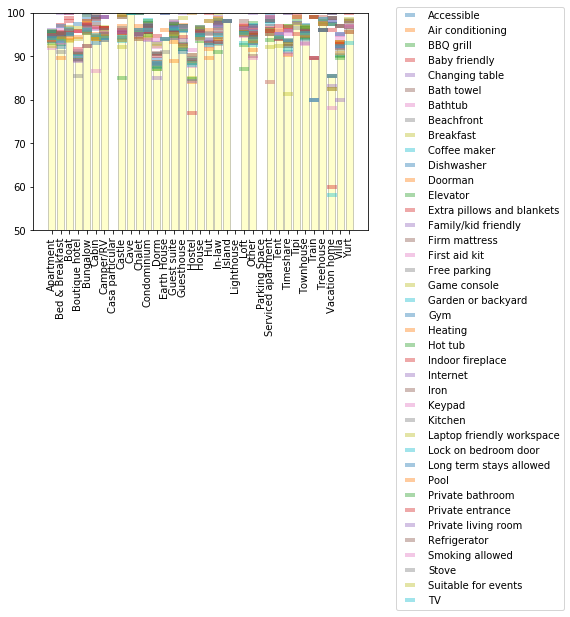

In [46]:
color = 'yellow'
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.2,  color=color, edgecolor = "black",linewidth=1)
for each in lst:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.4,linestyle='None',marker='_',mew=4,ms=10)
plt.tick_params(axis='x',rotation=90)
plt.ylim(50,100)
plt.legend(bbox_to_anchor=(1.6, 1.05))
plt.tight_layout()
plt.figure(figsize=(11,4))
plt.show()

In [ ]:
cur_amnty = 'Pool'
fig, ax1 = plt.subplots(figsize=(11,4))

color = 'orangered'
ax1.set_xlabel('Property Type')
ax1.set_ylabel("Average Review Score", color=color)
ax1.bar(df['property_type'], df['review_scores_rating'],  color=color, edgecolor = "black",linewidth=1)
ax1.tick_params(axis='y', labelcolor="black")
ax1.tick_params(axis='x',rotation=90)
ax1.set_ylim(85,100)

color = 'black'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(f"Sum of {cur_amnty}",  rotation = 270,color=color)  # we already handled the x-label with ax1
ax2.plot(df['property_type'], df[cur_amnty], linestyle='None',marker=r'$\top$',mew=1,ms=10,color=color)  
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.labelpad = 20 
fig.legend
fig.tight_layout()
plt.show()

In [ ]:
fare_sum = com_data[['type','fare']]
fare_plot = fare_sum.groupby(['type']).sum()
labels=fare_plot.index
colors=['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.pie(fare_plot, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
plt.tight_layout()

In [ ]:
plt.scatter(df['Family_kid_friendly'],  df['Pool'], df['review_scores_rating'],marker="o", alpha = .7,facecolors="orange", edgecolors="black")
#plt.scatter(df['number_of_reviews'],  df['Air_conditioning'], df['review_scores_rating'],marker="^", alpha = .3,facecolors="red", edgecolors="black", label ='Accessible')
#plt.scatter(df['number_of_reviews'],  df['Baby_friendly'], df['review_scores_rating'],marker="x", alpha = .3,facecolors="green", edgecolors="black", label ='Accessible')
#plt.scatter(df['number_of_reviews'],  df['Beachfront'], df['review_scores_rating'],marker="^", alpha = .3,facecolors="blue", edgecolors="black", label ='Accessible')
#plt.scatter(df['number_of_reviews'],  df['Breakfast'], df['review_scores_rating'],marker="^", alpha = .3,facecolors="yellow", edgecolors="black", label ='Accessible')
#plt.ylim(0,1000)
#plt.xlim(0,1000)
#plt.title("Handycap Accessible Features")
#plt.xlabel("Total Number of reviews")
#plt.ylabel("Average review score rating")
#plt.text(0, 0, "Note:  ", horizontalalignment='left', size='medium', color='black', weight='semibold')
#plt.legend(loc='upper right')

In [ ]:
# Obtain the x and y coordinates for each of the three city types
urb_data      = com_data.loc[com_data['type'] =='Urban',['city','fare']]
urb_data2     = com_data.loc[com_data['type'] =='Urban',['city','driver_count']]
urb_ridecnt   = urb_data.groupby('city').count()
urb_avgfare   = urb_data.groupby('city').mean()
urb_maxdriver = urb_data2.groupby('city').max()

sub_data      = com_data.loc[com_data['type'] =='Suburban',['city','fare']]
sub_data2     = com_data.loc[com_data['type'] =='Suburban',['city','driver_count']]
sub_ridecnt   = sub_data.groupby('city').count()
sub_avgfare   = sub_data.groupby('city').mean()
sub_maxdriver = sub_data2.groupby('city').max()

rrl_data      = com_data.loc[com_data['type'] =='Rural',['city','fare']]
rrl_data2     = com_data.loc[com_data['type'] =='Rural',['city','driver_count']]
rrl_ridecnt   = rrl_data.groupby('city').count()
rrl_avgfare   = rrl_data.groupby('city').mean()
rrl_maxdriver = rrl_data2.groupby('city').max()

# Build the scatter plots for each city types
plt.scatter(urb_ridecnt, urb_avgfare, urb_maxdriver*5, marker="o", alpha = .7,facecolors="orange", edgecolors="black", label ="Urban")
plt.scatter(sub_ridecnt, sub_avgfare, urb_maxdriver*5, marker="o", alpha = .7, facecolors="blue", edgecolors="black", label ="Suburban")
plt.scatter(rrl_ridecnt, rrl_avgfare, urb_maxdriver*5,  marker="o", alpha = .7, facecolors="yellow", edgecolors="black", label ="Rural")
# Incorporate the other graph properties
plt.ylim(15,45)
plt.xlim(0,45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Ride (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(50, 35, "Note: Circle size correlates with the driver count per city ", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.legend(loc='upper right')